In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('height-weight.csv')

In [65]:
df.head(2)

,Weight,Height
0,45,120
1,58,135


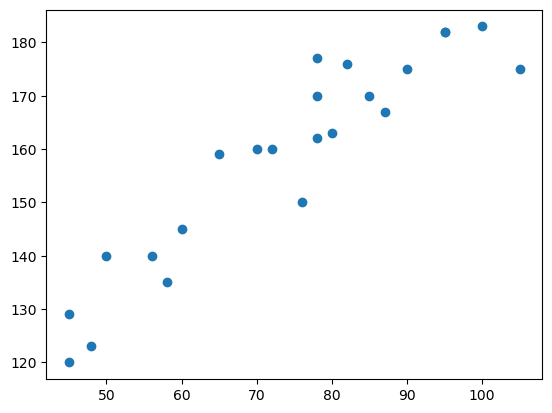

In [66]:
plt.scatter(x = "Weight" , y = "Height" , data = df)

In [67]:
X = df[['Weight']]
y = df['Height']

In [68]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [69]:
y


0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.20 , random_state = 42)

In [71]:
X_train.shape ,X_test.shape ,y_train.shape , y_test.shape 

((18, 1), (5, 1), (18,), (5,))

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

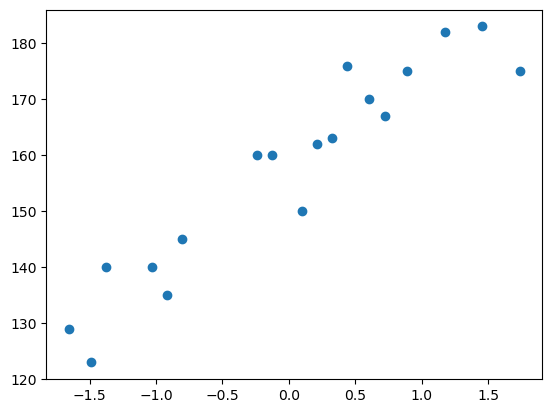

In [74]:
plt.scatter(X_train,y_train)

In [75]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [76]:
regressor.fit(X_train,y_train)

LinearRegression()

In [77]:
regressor.coef_

array([17.03440872])

In [78]:
regressor.intercept_

157.5

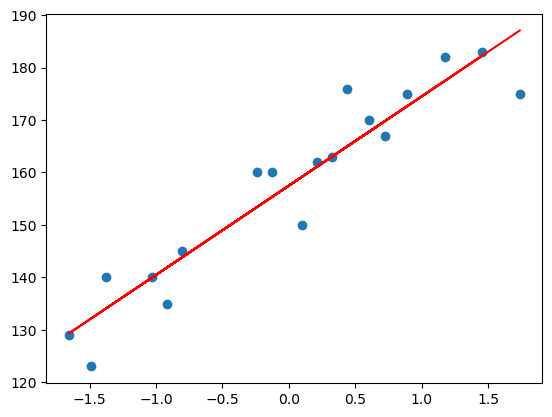

In [79]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [80]:
y_pred = regressor.predict(X_test)

In [81]:
y_test,y_pred

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]))

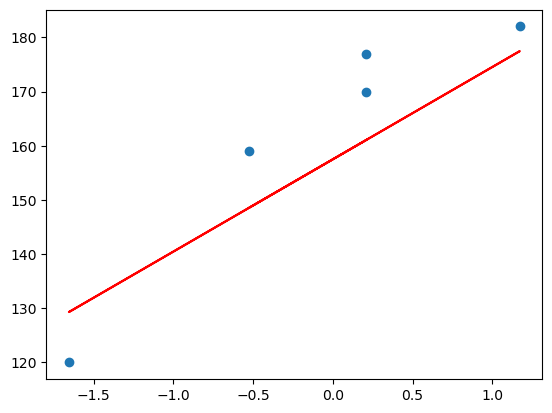

In [82]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [83]:
# MSE , MAE , RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [84]:
mse , mae , rmse

(109.77592599051664, 9.822657814519232, 10.477400726827081)

In [85]:
#Rsquared and Adjusted Rsquared
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [86]:
score

0.776986986042344

In [87]:
1-(1-score) * (len(y_test)-1)/len(y_test)- X_test.shape[1]-1

-1.1784104111661249

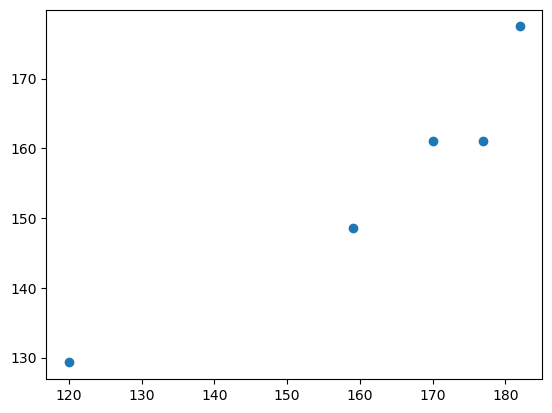

In [88]:
#Assumptions
plt.scatter(y_test,y_pred)

In [89]:
#Residuals
residuals = y_test , y_pred


In [90]:
residuals

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]))

<AxesSubplot: ylabel='Density'>

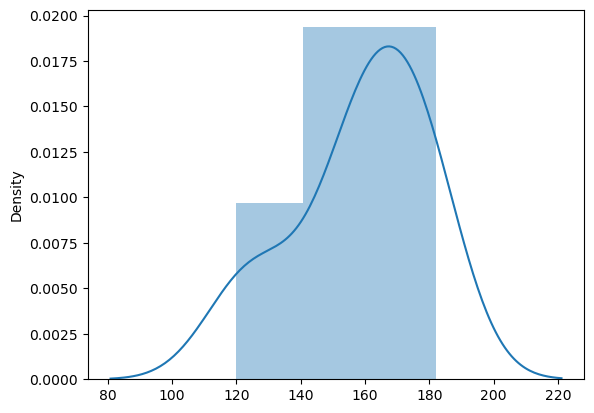

In [91]:
sns.distplot(residuals , kde = True)